In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [5]:
df= pd.read_csv("CC.csv")

df.head()

df.shape

(8950, 18)

In [6]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [7]:
x = df.iloc[:,[1,2,3,4]]
y = df.iloc[:,-1]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['CUST_ID'] = le.fit_transform(df.CUST_ID.values)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-1500.250819,-1114.178407,12
1,-592.910661,1914.657567,12
2,217.734556,905.144354,12
3,927.782551,-198.923616,12
4,-1310.548986,-359.591021,12


In [8]:
from sklearn.cluster import KMeans
nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)


0.7526240640619958


In [9]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf1 = pd.concat([principalDf1, df[['TENURE']]], axis = 1)
finalDf1.head()

from sklearn.cluster import KMeans
nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_Scale)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_Scale)
from sklearn import metrics
score = metrics.silhouette_score(X_Scale, y_cluster_kmeans)
print(score)

0.6778894462339318


In [40]:
df= pd.read_csv(r"pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [11]:
df.shape


(756, 755)

In [12]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [13]:
X = df.drop('class',axis=1).values
y = df['class'].values

In [14]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)

In [15]:
pca2 = PCA(n_components=3)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471076,-6.846404,1
1,-10.637725,1.583749,-6.830978,1
2,-13.516185,-1.253542,-6.818699,1
3,-9.155083,8.833599,15.290903,1
4,-6.764470,4.611466,15.637123,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_Scale,y, test_size=0.3,random_state=0)

svc = SVC(max_iter=1000)

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print("svm accuracy =", acc_svc)

svm accuracy = 91.68


In [17]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv("iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [36]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Species'].values)

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

In [38]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,9.423452,-0.513976,0
1,8.751900,-1.591678,0
2,8.973004,-1.068204,0
3,8.170186,-1.435135,0
4,9.249789,-0.136869,0


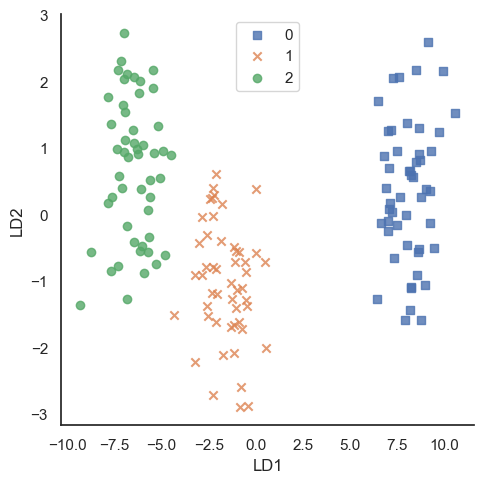

In [39]:
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()